In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib
import time
import pickle
import scipy
from scipy.stats import norm
from scipy.stats import multivariate_normal as mltnorm
from scipy.sparse import csr_matrix
from scipy.stats import randint
from scipy.stats import uniform
from scipy.optimize import minimize
import copy
import math
import time
from scipy.optimize import minimize
from scipy.sparse.linalg import svds
from scipy.linalg import svdvals
import scipy
from sklearn.datasets import load_svmlight_file
import pickle
from pathlib import Path
%matplotlib inline

In [2]:
from functions import *

In [3]:
from algorithms import *

In [4]:
from utils import *

# Logistic regression

## a9a

In [5]:
%%time
dataset = "a9a"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Number of functions in the sum: ", m, ", dimension of the problem: ", n)
L, average_L, worst_L = compute_L(dataset, A)
denseA = A.toarray()
print("Smoothness constant of the sum: ", L)
print("Average smoothness constant   : ", average_L)
print("Worst smoothness constant     : ", worst_L)
print("Fraction of non-zero elemenst : ", sparsity_A)

Number of functions in the sum:  32561 , dimension of the problem:  123
Smoothness constant of the sum:  1.5719196992226587
Average smoothness constant   :  3.467276803535652
Worst smoothness constant     :  3.5
Fraction of non-zero elemenst :  0.11275696922074716
Wall time: 221 ms


### Find the solution

In [6]:
filename=dataset+"_x_init_all_ones"
x_init = np.ones(n)
l2 = 0
l1 = 0

In [7]:
%%time
param = [A, y, l2, False]
res_solver = minimize(logreg_loss, x_init, args = param, jac=logreg_grad, 
                      method='L-BFGS-B',
                      options={'maxiter':10000, 'disp':True}, tol=1e-10)

print(res_solver.success)
print(res_solver.fun)
print(res_solver)

True
0.3226208396310953
      fun: 0.3226208396310953
 hess_inv: <123x123 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.20008505e-07,  5.90856349e-08,  2.90511095e-07,  2.84298176e-07,
        1.15779119e-07,  7.85931516e-07, -6.29849995e-07,  1.98949462e-08,
        6.54375652e-08,  5.29914108e-07,  3.58350086e-07,  1.95528024e-08,
        1.41022009e-08,  1.47563709e-07,  1.88919495e-07,  4.45961879e-07,
        1.34818371e-07,  1.52419076e-07,  2.94826236e-07,  2.79629054e-07,
       -1.04083787e-07, -1.79897473e-07,  1.63976701e-07, -1.38062472e-07,
       -1.67086263e-07,  2.29728222e-08, -5.63619965e-08, -6.97061978e-08,
        1.05284774e-06, -3.30135669e-08,  3.93739291e-07, -3.76951577e-07,
       -2.96335272e-08,  1.64875473e-08,  1.40400585e-07, -1.79897473e-07,
        2.79629054e-07, -3.05148734e-07,  1.13469910e-06,  1.13669934e-06,
        2.53792853e-08,  2.73185427e-07,  2.35514451e-08,  3.29028115e-07,
       -5.54136576e-07, -1.64024509e-07, -1.339619

In [8]:
save_solution(dataset, l2, l1, np.array(res_solver.x), res_solver.fun)

# Parameters

In [9]:
l2 = 0
l1 = 0
sparse = False
sparse_full = True


bs = 100

x_star = read_solution(dataset, l2, l1)[0]
f_star = read_solution(dataset, l2, l1)[1]

num_of_non_zeros = 1
x_init = deepcopy(x_star)
shift_param = 50.0
x_init[0:num_of_non_zeros] += shift_param
N = 200

filename = dataset+"_init_first_"+str(num_of_non_zeros)+"_shift_"+str(shift_param)
delta = 0
t = 1e-8
param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, t]


print("f(x_0)-f(x^*) = ", logreg_loss(x_init, [A, y, l2, False, t]) - f_star)
epsilon = 1e-3

f(x_0)-f(x^*) =  8.552361910350593


# Tests

### ARDFDS_E

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_e_noise_logreg(filename, x_init, args=param, bs=bs, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

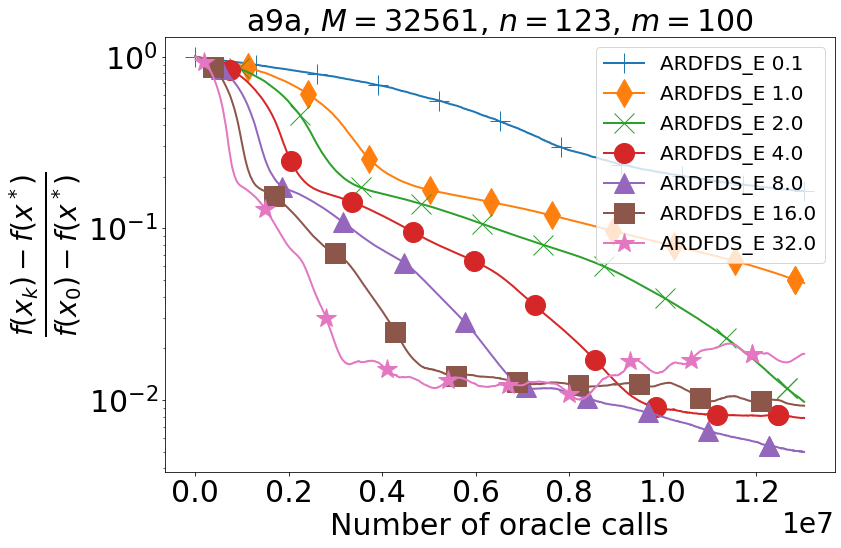

In [10]:
methods = [['ARDFDS_E logreg', [0.1, N, delta, bs], "ARDFDS_E "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_E logreg', [tuning_stepsize_param_options_ardfds_e[i], N, delta, bs], 
                          "ARDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset+r", $M = $"+str(m)+r", $n = $"+str(n)+r", $m = $"+str(bs)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_e_noise_tuning_stepsize_"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### ARDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_ne_noise_logreg(filename, x_init, args=param, bs=bs, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

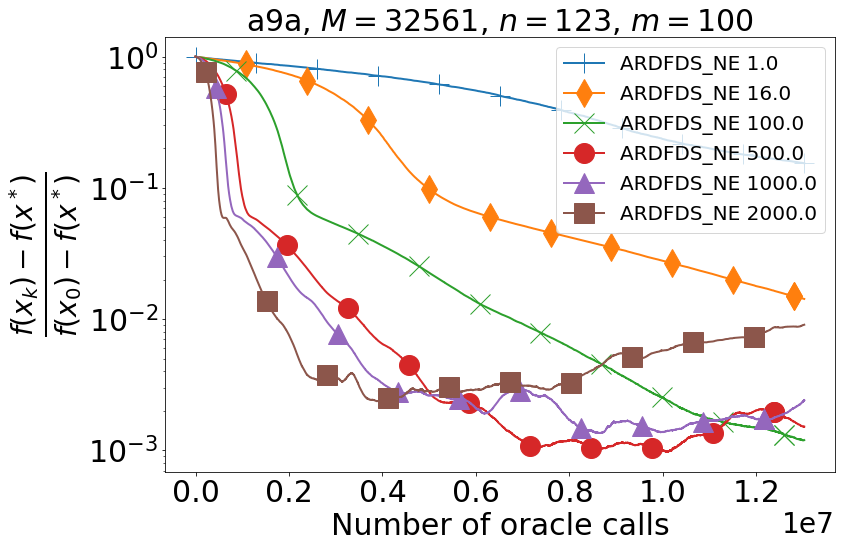

In [11]:
methods = [['ARDFDS_NE logreg', [1.0, N, delta, bs], "ARDFDS_NE "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_NE logreg', [tuning_stepsize_param_options_ardfds_e[i], N, delta, bs], 
                          "ARDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset+r", $M = $"+str(m)+r", $n = $"+str(n)+r", $m = $"+str(bs)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_ne_noise_tuning_stepsize_"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_E

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 16.0, 32.0, 64.0, 128.0, 150.0, 175.0, 250.0, 300.0, 500.0, 1000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_e_noise_logreg(filename, x_init, args=param, bs=bs, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

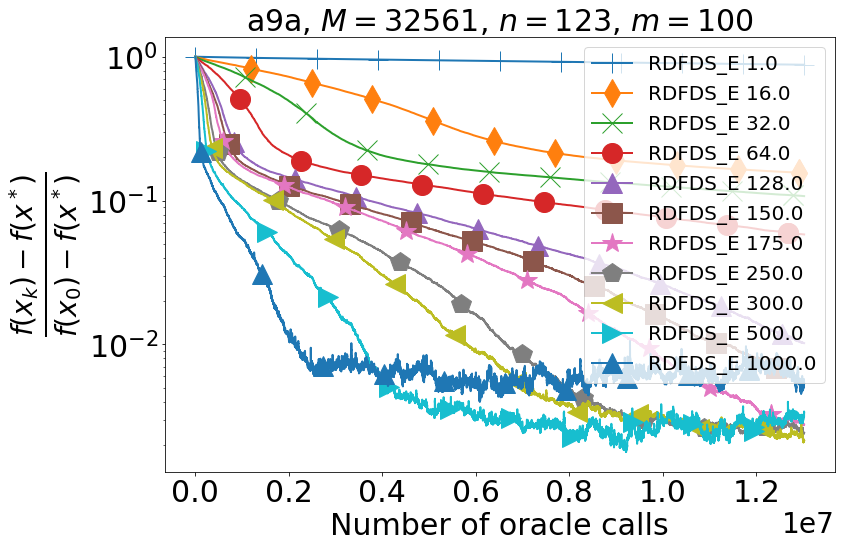

In [12]:
methods = [['RDFDS_E logreg', [1.0, N, delta, bs], "RDFDS_E "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 16.0, 32.0, 64.0, 128.0, 150.0, 175.0, 250.0, 300.0, 500.0, 1000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_E logreg', [tuning_stepsize_param_options_ardfds_e[i], N, delta, bs], 
                          "RDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset+r", $M = $"+str(m)+r", $n = $"+str(n)+r", $m = $"+str(bs)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_e_noise_tuning_stepsize_"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 16.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0, 15000.0, 20000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_ne_noise_logreg(filename, x_init, args=param, bs=bs, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

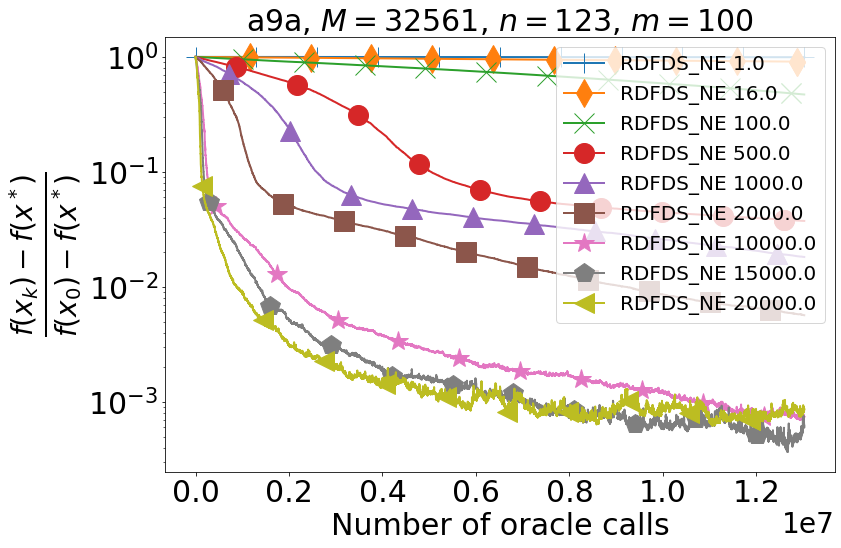

In [13]:
methods = [['RDFDS_NE logreg', [1.0, N, delta, bs], "RDFDS_NE "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 16.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0, 15000.0, 20000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_NE logreg', [tuning_stepsize_param_options_ardfds_e[i], N, delta, bs], 
                          "RDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset+r", $M = $"+str(m)+r", $n = $"+str(n)+r", $m = $"+str(bs)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_ne_noise_tuning_stepsize_"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RSGF

In [ ]:
%%time
initial_stepsizes = [1.0]
tuning_stepsizes = [1.0, 2.0, 4.0, 10.0, 20.0, 30.0, 50.0, 100.0, 200.0]

for initial_stepsize in initial_stepsizes:
    for tuning_stepsize in tuning_stepsizes:
        res = rsgf_tune_noise_logreg(filename, x_init, args=param, bs=bs, N=N, 
                        f_star=f_star, x_star=x_star, initial_stepsize=initial_stepsize,tuning_stepsize=tuning_stepsize)
        print("Finished with ", tuning_stepsize)

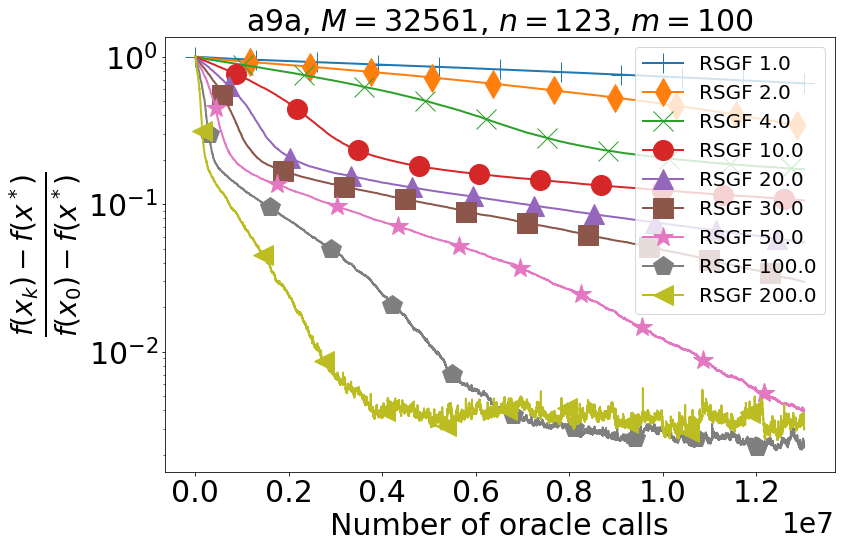

In [14]:
methods = [['RSGF logreg', [1.0, 1.0, N, delta, bs], "RSGF "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 10.0, 20.0, 30.0, 50.0, 100.0, 200.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RSGF logreg', [1.0, tuning_stepsize_param_options_ardfds_e[i], N, delta, bs], 
                          "RSGF "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset+r", $M = $"+str(m)+r", $n = $"+str(n)+r", $m = $"+str(bs)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rsgf_noise_tuning_stepsize_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### Comparison

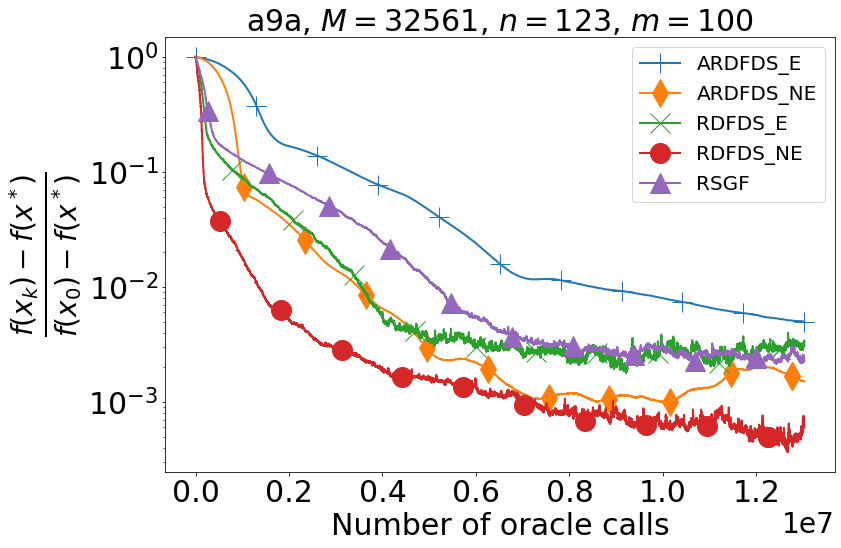

In [15]:
methods = [
    ['ARDFDS_E logreg', [8.0, N, delta, bs], "ARDFDS_E", None],
    ['ARDFDS_NE logreg', [500.0, N, delta, bs], "ARDFDS_NE", None],
    ['RDFDS_E logreg', [500.0, N, delta, bs], "RDFDS_E", None],
    ['RDFDS_NE logreg', [15000.0, N, delta, bs], "RDFDS_NE", None],
    ['RSGF logreg', [1.0, 100.0, N, delta, bs], "RSGF", None],
    ]

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset+r", $M = $"+str(m)+r", $n = $"+str(n)+r", $m = $"+str(bs)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_comparison_stoch_noise_delta_"+str(delta)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)